### Importar librerías necesarias

En este notebook, vamos a utilizar varias librerías para realizar diferentes tareas. A continuación, se muestra una lista de las librerías que vamos a importar:

- Pandas: una librería de análisis de datos que nos permite manipular y analizar conjuntos de datos de manera eficiente.
- NumPy: una librería de cálculo numérico que nos proporciona herramientas para realizar operaciones matemáticas en matrices y arreglos multidimensionales.
- Matplotlib: una librería de visualización de datos que nos permite crear gráficos y visualizaciones atractivas.
- Scikit-learn: una librería de aprendizaje automático que nos proporciona herramientas para realizar tareas de clasificación, regresión, clustering y más.
- Seaborn: una librería de visualización de datos basada en Matplotlib que nos permite crear gráficos estadísticos más avanzados y atractivos.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Fase I: Definición de necesidades

In [79]:
def load_data(csv_path):
    """
    Carga los datos desde un archivo CSV.
    Args:
        csv_path (str): Ruta del archivo CSV.
    Returns:
        pd.DataFrame: DataFrame con los datos cargados.
    """
    return pd.read_csv(csv_path)

In [80]:
# Ruta del CSV
csv_path = "data/call_center_data.csv"

# Cargar los datos
df = load_data(csv_path)

### Fase II: Estudio y comprensión de los datos


In [81]:
def summarize_data(df):
    """
    Muestra estadísticas y verifica valores faltantes.
    Args:
        df (pd.DataFrame): DataFrame de entrada.
    """
    print("Resumen de los datos:\n", df.describe())
    print("\nValores faltantes:\n", df.isnull().sum())

In [82]:
# Resumen de los datos
summarize_data(df)

Resumen de los datos:
        employee_id  sentiment_level     bad_call
count  1000.000000      1000.000000  1000.000000
mean     25.830000         5.445320     0.327000
std      14.346809         2.583994     0.469352
min       1.000000         1.000000     0.000000
25%      14.000000         3.120000     0.000000
50%      26.000000         5.475000     0.000000
75%      37.000000         7.720000     1.000000
max      50.000000        10.000000     1.000000

Valores faltantes:
 employee_id        0
department         0
sentiment_level    0
bad_call           0
dtype: int64


### Fase III: Análisis exploratorio de datos (EDA)

In [83]:
def correlation_analysis(df):
    """
    Calcula y visualiza la matriz de correlación entre las variables numéricas.
    Args:
        df (pd.DataFrame): DataFrame de entrada.
    """
    # Calcular matriz de correlación
    corr = df[['employee_id', 'sentiment_level', 'bad_call']].corr()

    print("\nMatriz de correlación:\n", corr)

    # Visualización de la matriz de correlación
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Mapa de Calor - Matriz de Correlación')
    plt.show()

In [84]:
def eda(df):
    """
    Realiza análisis exploratorio con gráficos básicos.
    Args:
        df (pd.DataFrame): DataFrame de entrada.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment_level'], kde=True)
    plt.title('Distribución del Nivel de Sentimiento')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='department', y='sentiment_level')
    plt.title('Nivel de Sentimiento por Departamento')
    plt.show()

    # Matriz de correlación
    correlation_matrix = df[['employee_id', 'sentiment_level', 'bad_call']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title('Matriz de Correlación')
    plt.show()



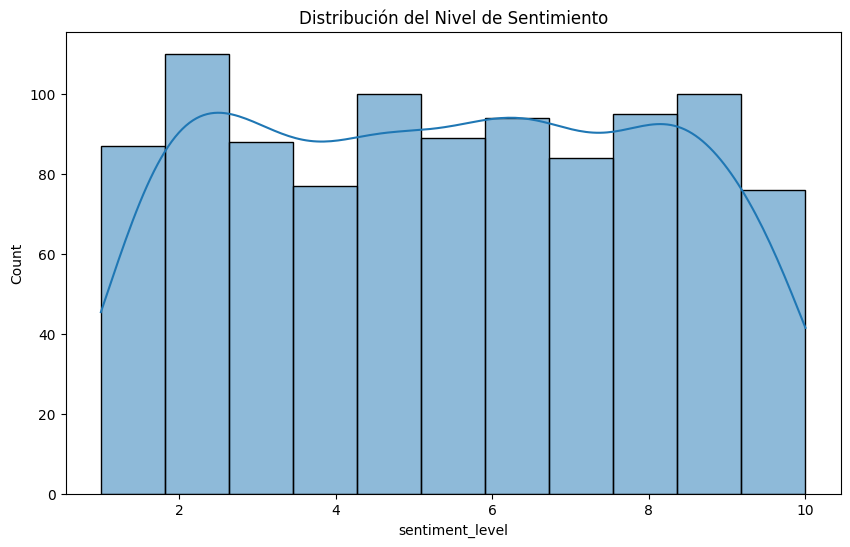

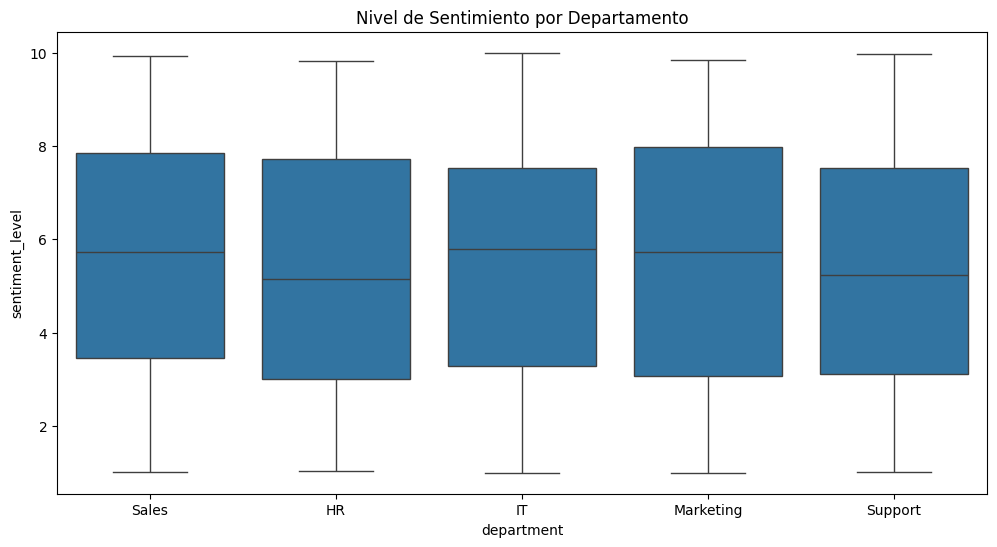

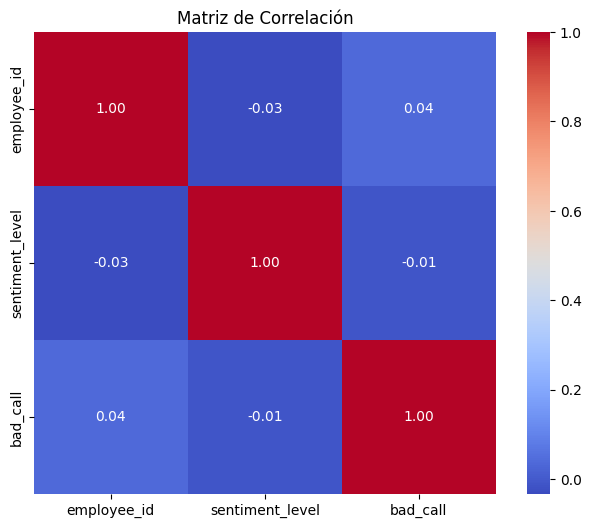

In [85]:
# Análisis exploratorio
eda(df)

### Fase IV: Modelado

In [86]:
def apply_clustering(df, n_clusters=3):
    """
    Aplica clustering K-means basado en el nivel de sentimiento.
    Args:
        df (pd.DataFrame): DataFrame de entrada.
        n_clusters (int): Número de clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[['sentiment_level']])
    print("Centroides de los clusters:\n", kmeans.cluster_centers_)


In [87]:
# Aplicar clustering
apply_clustering(df)

Centroides de los clusters:
 [[5.65636103]
 [8.57390728]
 [2.52702006]]


In [88]:
# Fase V: Evaluación
def evaluate_model(y_true, y_pred):
    """
    Evalúa el modelo utilizando métricas de clasificación.
    Args:
        y_true (array): Etiquetas verdaderas.
        y_pred (array): Etiquetas predichas.
    """
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_true, y_pred))

In [89]:
def apply_classification(df, max_depth=3):
    """
    Entrena un árbol de decisión para predecir llamadas malas y muestra su visualización.
    Args:
        df (pd.DataFrame): DataFrame de entrada.
        max_depth (int): Profundidad máxima del árbol para mejorar la visualización.
    """
    # Codificar variables categóricas
    df_encoded = pd.get_dummies(df, columns=['department'], drop_first=True)

    # Definir variables independientes (X) y dependiente (y)
    X = df_encoded.drop(columns=['bad_call'])
    y = df_encoded['bad_call']

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Entrenar el árbol de decisión con profundidad limitada
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = clf.predict(X_test)

    # Evaluar el modelo
    evaluate_model(y_test, y_pred)

    # Visualización del árbol de decisión
    plt.figure(figsize=(24, 12))
    plot_tree(
        clf,
        filled=True,
        feature_names=X.columns,
        class_names=['Good', 'Bad'],
        fontsize=12,
        rounded=True,
        precision=2
    )
    plt.show()

Matriz de Confusión:
 [[191   6]
 [ 99   4]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.66      0.97      0.78       197
           1       0.40      0.04      0.07       103

    accuracy                           0.65       300
   macro avg       0.53      0.50      0.43       300
weighted avg       0.57      0.65      0.54       300



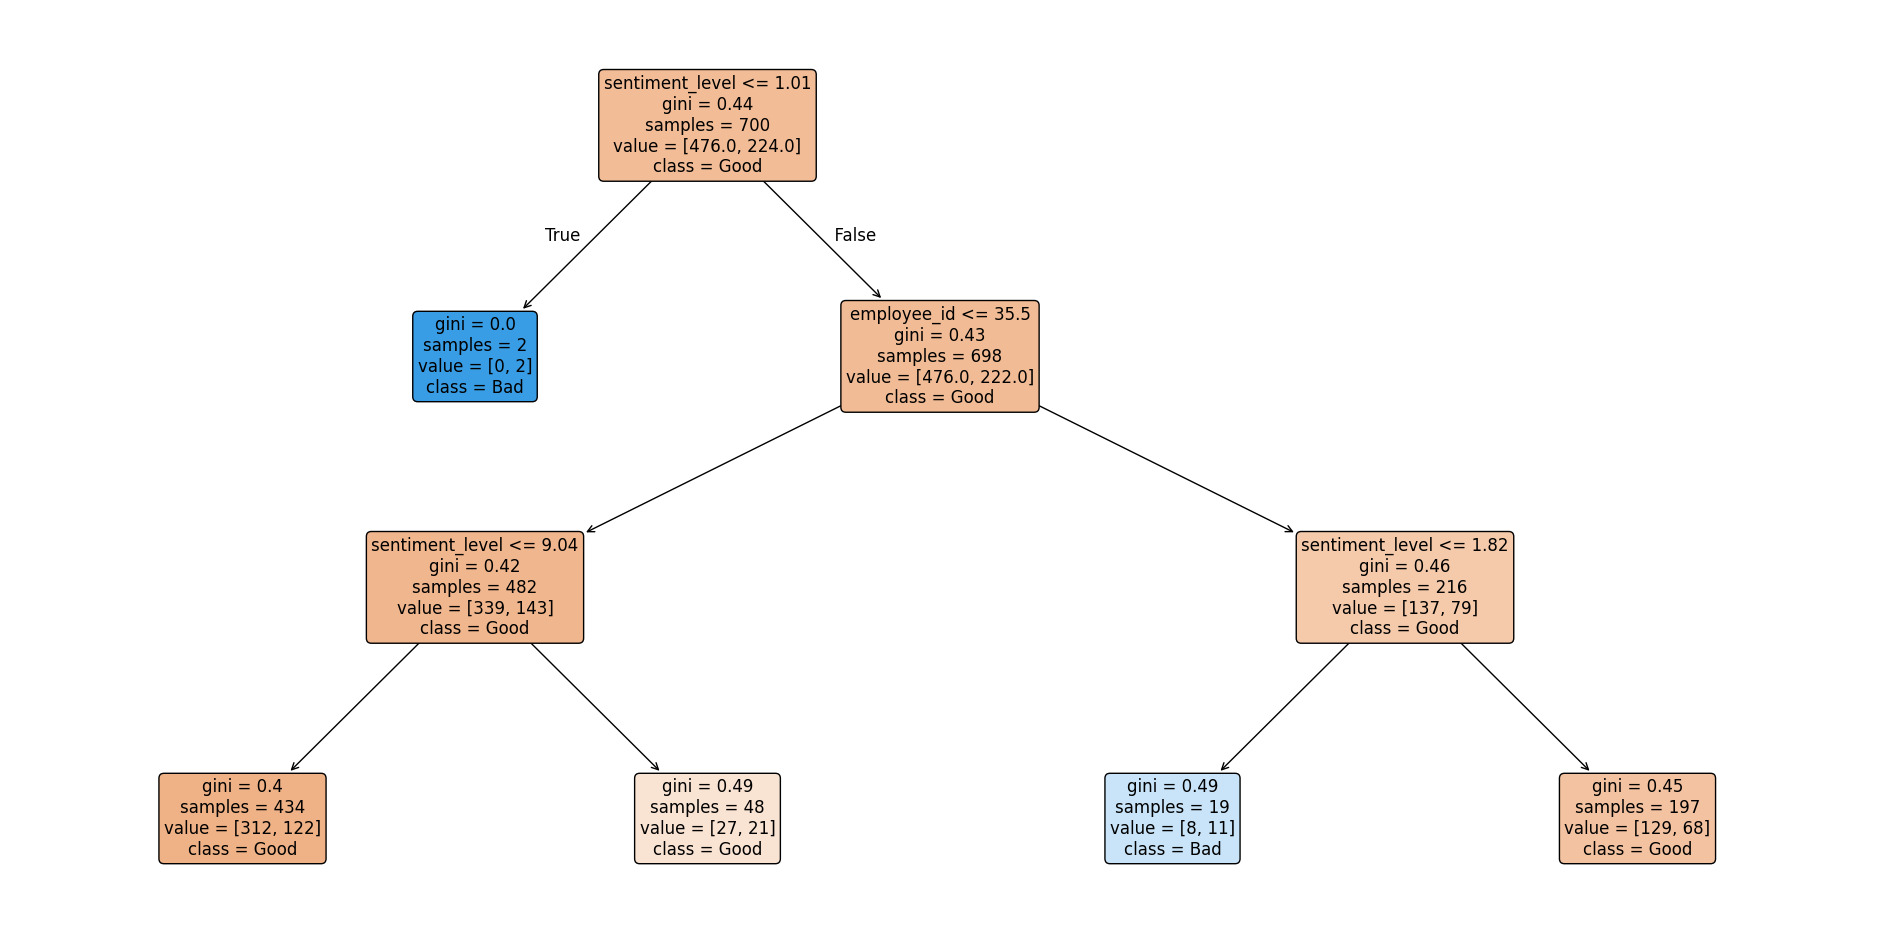

In [90]:
# Aplicar clasificación
apply_classification(df)